<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a CNN for MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

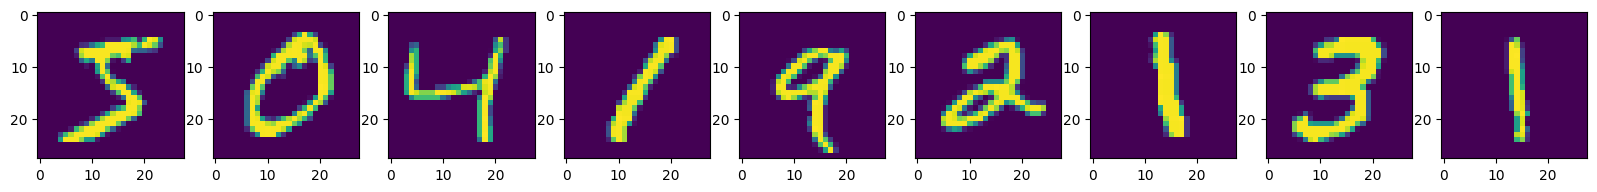

In [73]:
fig,axes = plt.subplots(1,9,figsize=(20,10))
for i in range(9):
  axes[i].imshow(X_train[i])

<Axes: ylabel='count'>

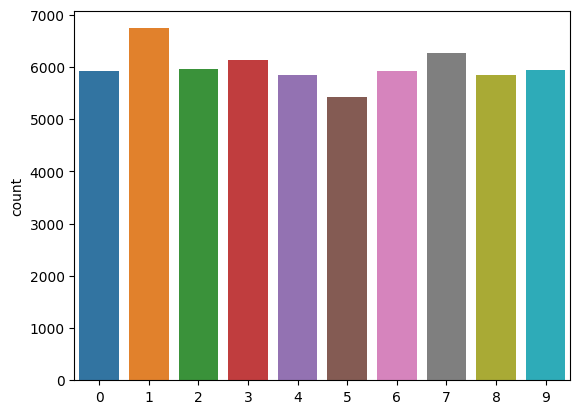

In [4]:
sns.countplot(x=y_train)

In [5]:
# Normalizing to [0,1]
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
# Reshaping

input_shape = (28,28,1)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# Encoding the labels

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [9]:
y_train[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

0


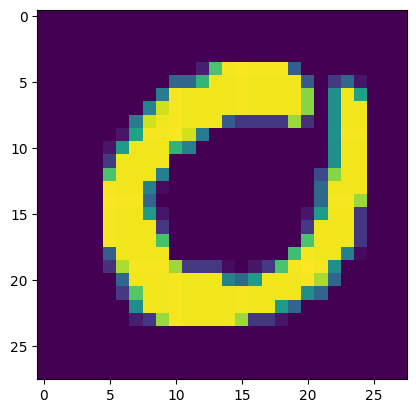

In [10]:
plt.imshow(X_train[121])
print(np.argmax(y_train[121]))

# Building a 2D CNN
- ***Convolution Operation***: In the convolutional layers of a CNN, a set of learnable filters (also known as kernels) slide or "convolve" across the input image or the output of a previous layer. At each position of the convolution operation, the filter computes a weighted sum of the values in the local region of the input. This operation results in a single output value, which is placed in the corresponding position of the feature map.
  - Feature maps are crucial because they capture different aspects of the input data as a result of the convolution operation with various filters. In deeper layers of the network, these feature maps become increasingly abstract and represent higher-level features, which are essential for tasks like image classification, object detection, and segmentation. The CNN learns to recognize patterns and features that are relevant for the specific task it's trained on by adjusting the filter weights during training through backpropagation.
  
- ***Multiple Filters***: Typically, a layer in a CNN will use multiple filters simultaneously. Each filter is responsible for detecting different patterns or features in the input, such as edges, corners, textures, or more complex structures.

- ***Depth***: The collection of feature maps generated by applying multiple filters to the same input is often referred to as the "depth" of the layer. For example, if you apply 32 different filters to an input image, you'll produce 32 feature maps in that layer.

- ***Activation Function***: After computing the weighted sum for each position, an activation function (commonly ReLU or another non-linear function) is applied element-wise to introduce non-linearity and increase the network's expressive power.

- ***Downsampling***: In many CNN architectures, after convolution, feature maps may undergo operations like pooling or striding to reduce their spatial dimensions, which helps in reducing the number of parameters and computational complexity.

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

In [12]:
model = Sequential()

# INPUT LAYER
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))

model.add(MaxPool2D(strides=(1,1))) # It means that the pooling window moves one unit (pixel) at a time.
model.add(Dropout(rate=0.25))

# HIDDEN LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
# OUTPUT LAYER
model.add(Dense(units=128,activation='relu')) #  Each unit or neuron in a Dense layer is connected to every neuron in the previous layer.
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='softmax'))

In [38]:
# Compile the model

# Optimizers are algorithms used in training deep neural networks to update the model's parameters (weights and biases)
# during the training process. Their primary goal is to minimize
# the loss function by adjusting the model's parameters in a way that makes the model's predictions more accurate.

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 27, 27, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 64)        36928     
                                                        

In [14]:
# Callbacks after training on each epoch
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [15]:
# Fit the training data
epochs = 10
batch_size=64

history = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/10
844/844 [==============================] - ETA: 0s - loss: 0.2010 - acc: 0.9387

844/844 [==============================] - 26s 13ms/step - loss: 0.2010 - acc: 0.9387 - val_loss: 0.0494 - val_acc: 0.9857
Epoch 2/10
844/844 [==============================] - ETA: 0s - loss: 0.0743 - acc: 0.9789

844/844 [==============================] - 11s 13ms/step - loss: 0.0743 - acc: 0.9789 - val_loss: 0.0411 - val_acc: 0.9898
Epoch 3/10
844/844 [==============================] - ETA: 0s - loss: 0.0586 - acc: 0.9836

844/844 [==============================] - 11s 13ms/step - loss: 0.0586 - acc: 0.9836 - val_loss: 0.0456 - val_acc: 0.9880
Epoch 4/10
843/844 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9853

844/844 [==============================] - 11s 13ms/step - loss: 0.0519 - acc: 0.9853 - val_loss: 0.0345 - val_acc: 0.9910
Epoch 5/10
842/844 [============================>.] - ETA: 0s - loss: 0.0529 - acc: 0.9857

844/844 [==============================] - 12s 14ms/step - loss: 0.0529 - acc: 0.9857 - val_loss: 0.0380 - val_acc: 0.9887
Epoch 6/10
840/844 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9870

844/844 [==============================] - 11s 13ms/step - loss: 0.0497 - acc: 0.9870 - val_loss: 0.0347 - val_acc: 0.9918
Epoch 7/10
840/844 [============================>.] - ETA: 0s - loss: 0.0539 - acc: 0.9860

844/844 [==============================] - 11s 13ms/step - loss: 0.0537 - acc: 0.9860 - val_loss: 0.0392 - val_acc: 0.9918
Epoch 8/10
841/844 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9857

844/844 [==============================] - 11s 13ms/step - loss: 0.0547 - acc: 0.9857 - val_loss: 0.0427 - val_acc: 0.9923
Epoch 9/10
843/844 [============================>.] - ETA: 0s - loss: 0.0560 - acc: 0.9867

844/844 [==============================] - 11s 13ms/step - loss: 0.0560 - acc: 0.9867 - val_loss: 0.0483 - val_acc: 0.9872
Epoch 10/10
841/844 [============================>.] - ETA: 0s - loss: 0.0562 - acc: 0.9867

844/844 [==============================] - 11s 13ms/step - loss: 0.0562 - acc: 0.9867 - val_loss: 0.0499 - val_acc: 0.9897


In [26]:
history.history

{'loss': [0.2010166347026825,
  0.07431390136480331,
  0.05864498391747475,
  0.0518856979906559,
  0.0529460646212101,
  0.04968217387795448,
  0.05371251702308655,
  0.05469707399606705,
  0.05595660209655762,
  0.056234072893857956],
 'acc': [0.9387221932411194,
  0.978851854801178,
  0.9836296439170837,
  0.9852777719497681,
  0.9857222437858582,
  0.9869999885559082,
  0.9860185384750366,
  0.9857407212257385,
  0.9867036938667297,
  0.9866666793823242],
 'val_loss': [0.04937496408820152,
  0.04111082851886749,
  0.04556455463171005,
  0.03454812243580818,
  0.037950120866298676,
  0.0346873514354229,
  0.039221279323101044,
  0.04267660528421402,
  0.04830798879265785,
  0.04989461600780487],
 'val_acc': [0.9856666922569275,
  0.9898333549499512,
  0.9879999756813049,
  0.9909999966621399,
  0.9886666536331177,
  0.9918333292007446,
  0.9918333292007446,
  0.9923333525657654,
  0.9871666431427002,
  0.9896666407585144]}

## Visualizing results

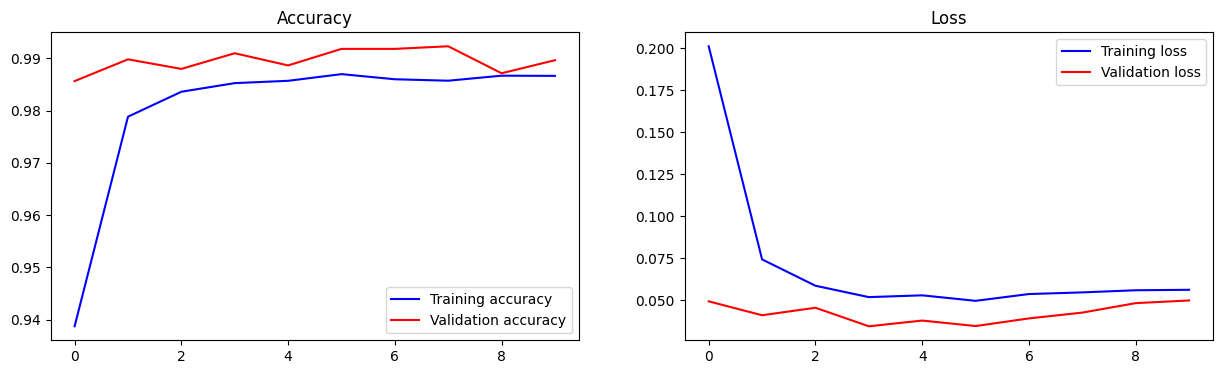

In [36]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

# Plotting accuracy of training vs validation
axes[0].plot(history.history['acc'], label='Training accuracy', color='blue')
axes[0].plot(history.history['val_acc'], label='Validation accuracy', color='red')
axes[0].set_title('Accuracy')
legend = axes[0].legend(loc='best')

# Plotting loss of training vs validation
axes[1].plot(history.history['loss'], label='Training loss', color='blue')
axes[1].plot(history.history['val_loss'], label='Validation loss', color='red')
axes[1].set_title('Loss')
legend = axes[1].legend(loc='best')

In [37]:
# Saving the trained model

model.save('./mnist-model')

In [40]:
# Check the model on testing data

loss, acc = model.evaluate(X_test, y_test)
loss, acc

313/313 [==============================] - 2s 4ms/step - loss: 0.0430 - acc: 0.9891


(0.04296600818634033, 0.9890999794006348)

- Around 98.9% accuracy achieved on test images

In [46]:
# Visualizing the predictions

y_preds = model.predict(X_test)
y_preds

313/313 [==============================] - 1s 2ms/step


array([[2.9404293e-16, 2.2925707e-15, 3.8298605e-12, ..., 1.0000000e+00,
        1.8622549e-15, 4.8945369e-11],
       [1.7917111e-09, 3.8594072e-11, 1.0000000e+00, ..., 1.2869802e-11,
        7.9468637e-10, 4.8460280e-15],
       [3.6500294e-22, 1.0000000e+00, 1.1871251e-17, ..., 2.6079779e-17,
        3.5153267e-17, 9.1910964e-22],
       ...,
       [2.1236185e-28, 3.0957464e-20, 5.3948670e-22, ..., 3.3344809e-19,
        7.6711412e-20, 7.2626246e-17],
       [6.3507608e-13, 1.9711682e-16, 7.1755483e-17, ..., 4.4009986e-13,
        3.6617609e-09, 1.4022848e-10],
       [6.2406952e-10, 2.2371677e-14, 9.5171301e-12, ..., 7.3762309e-18,
        3.8758227e-10, 1.1475989e-16]], dtype=float32)

In [47]:
# Converting the predictions to labels
y_preds = np.argmax(y_preds, axis=1)
y_preds[:10], y_preds.shape

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), (10000,))

In [49]:
# Converting the test data into labels
y_test = np.argmax(y_test, axis=1)
y_test[:10], y_test.shape

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), (10000,))

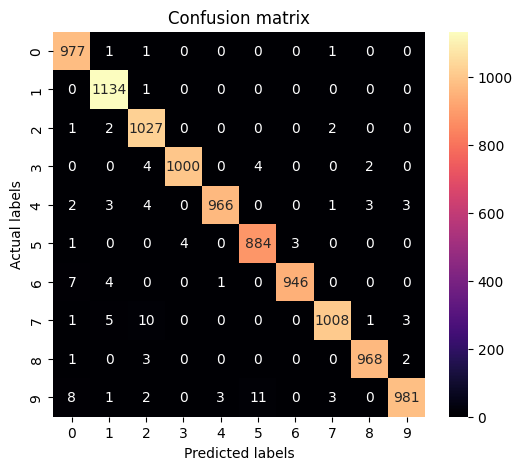

In [65]:
from tensorflow.math import confusion_matrix

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix');